In [1]:
# 切割问题

original_price = [1, 5, 8, 9, 10, 17, 17, 20, 24, 30, 35]

In [2]:
from collections import defaultdict
prices = defaultdict(int)
for i, price in enumerate(original_price, start=1):
    prices[i] = price

In [3]:
prices

defaultdict(int,
            {1: 1,
             2: 5,
             3: 8,
             4: 9,
             5: 10,
             6: 17,
             7: 17,
             8: 20,
             9: 24,
             10: 30,
             11: 35})

In [4]:
# 定义一个闭包，制作装饰器

from functools import wraps
from collections import defaultdict
count = defaultdict(int)
def func_count(f):
    @wraps(f)
    def exec(arg):
        res = f(arg)
        count["{0}({1})".format(f.__name__, arg)] += 1
        return res
    return exec

# 闭包形成一个环境

In [5]:
# 定义一个闭包，制作装饰器

from functools import wraps
from collections import defaultdict

count = defaultdict(int)
def func_count(f):
    @wraps(f)
    def exec(arg):
        res = f(arg)
        count["{0}({1})".format(f.__name__, arg)] += 1
        return res
    return exec

def memo(f):
    already_done = {}
    @wraps(f)
    def _wrap(arg):
        if arg in already_done:
            result = already_done[arg]
        else:
            result = f(arg)
            already_done[arg] = result
        return result
    return _wrap

# 闭包形成一个环境

# 切割函数
# r(n) = max(p, r(1)+r(n-1), r(2)+r(n-2), ...)

solutions = {}
@memo
@func_count
def r(n):
    max_price, max_split = max([(prices[n], 0)]+[(r(i)+r(n-i), i) for i in range(1, n//2+1)], key=lambda x:x[0])
    solutions[n] = (max_split, n-max_split)
    return max_price

In [6]:
r(234)

743

In [7]:
count

defaultdict(int,
            {'r(1)': 1,
             'r(2)': 1,
             'r(3)': 1,
             'r(4)': 1,
             'r(5)': 1,
             'r(6)': 1,
             'r(7)': 1,
             'r(8)': 1,
             'r(9)': 1,
             'r(10)': 1,
             'r(11)': 1,
             'r(12)': 1,
             'r(13)': 1,
             'r(14)': 1,
             'r(15)': 1,
             'r(16)': 1,
             'r(17)': 1,
             'r(18)': 1,
             'r(19)': 1,
             'r(20)': 1,
             'r(21)': 1,
             'r(22)': 1,
             'r(23)': 1,
             'r(24)': 1,
             'r(25)': 1,
             'r(26)': 1,
             'r(27)': 1,
             'r(28)': 1,
             'r(29)': 1,
             'r(30)': 1,
             'r(31)': 1,
             'r(32)': 1,
             'r(33)': 1,
             'r(34)': 1,
             'r(35)': 1,
             'r(36)': 1,
             'r(37)': 1,
             'r(38)': 1,
             'r(39)': 1,
             'r(4

In [8]:
solutions

{1: (0, 1),
 2: (0, 2),
 3: (0, 3),
 4: (2, 2),
 5: (2, 3),
 6: (0, 6),
 7: (1, 6),
 8: (2, 6),
 9: (3, 6),
 10: (0, 10),
 11: (0, 11),
 12: (1, 11),
 13: (2, 11),
 14: (3, 11),
 15: (2, 13),
 16: (2, 14),
 17: (6, 11),
 18: (1, 17),
 19: (2, 17),
 20: (3, 17),
 21: (10, 11),
 22: (11, 11),
 23: (1, 22),
 24: (2, 22),
 25: (3, 22),
 26: (2, 24),
 27: (2, 25),
 28: (6, 22),
 29: (1, 28),
 30: (2, 28),
 31: (3, 28),
 32: (10, 22),
 33: (11, 22),
 34: (1, 33),
 35: (2, 33),
 36: (3, 33),
 37: (2, 35),
 38: (2, 36),
 39: (6, 33),
 40: (1, 39),
 41: (2, 39),
 42: (3, 39),
 43: (10, 33),
 44: (11, 33),
 45: (1, 44),
 46: (2, 44),
 47: (3, 44),
 48: (2, 46),
 49: (2, 47),
 50: (6, 44),
 51: (1, 50),
 52: (2, 50),
 53: (3, 50),
 54: (10, 44),
 55: (11, 44),
 56: (1, 55),
 57: (2, 55),
 58: (3, 55),
 59: (2, 57),
 60: (2, 58),
 61: (6, 55),
 62: (1, 61),
 63: (2, 61),
 64: (3, 61),
 65: (10, 55),
 66: (11, 55),
 67: (1, 66),
 68: (2, 66),
 69: (3, 66),
 70: (2, 68),
 71: (2, 69),
 72: (6, 66),


In [9]:
def parse_solution(n):
    left_split, right_split = solutions[n]
    
    if left_split == 0: return [right_split]
    
    return parse_solution(left_split) + parse_solution(right_split)

In [10]:
parse_solution(234)

[3,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11]

## Dynamic Programming

不断查表的意思
+ 分析子问题的重复性
+ 子问题进行存储
+ Solution 要进行解析

## Edit Distance

In [11]:
# 计算编辑距离有4个不同的子问题，分别是add, del, sub以及不变，所有比较都发生在两个子字符串的最后一个字母

solutions = {}
def edit_distance(s1, s2):
    if len(s1) == 0:
        return len(s2)
    if len(s2) == 0:
        return len(s1)
    
    tail_s1 = s1[-1]
    tail_s2 = s2[-1]
    
    # add, del的操作，在计算编辑距离时，无需判断末尾字母是否相同
    candidates = [(edit_distance(s1[:-1], s2)+1, "DEL: {0}".format(tail_s1)), # 删除s1末尾字母后再进行比较
                  (edit_distance(s1, s2[:-1])+1, "ADD: {0}".format(tail_s2))  # 比较之后在s1末尾加上s2末尾字母 
                 ]
    
    # 不做增删，只做调整
    if tail_s1 == tail_s2:
        candidates.append((edit_distance(s1[:-1], s2[:-1]), ''))
    else:
        candidates.append((edit_distance(s1[:-1], s2[:-1])+1, "SUB: {0}->{1}".format(tail_s1, tail_s2)))
        
    min_edit_distance, operation = min(candidates, key=lambda x:x[0])
    
    solutions[(s1, s2)] = operation
    
    return min_edit_distance

In [12]:
edit_distance('ATCGGAA', 'ATCGGGA')

1

In [13]:
solutions

{('A', 'A'): '',
 ('A', 'AT'): 'ADD: T',
 ('A', 'ATC'): 'ADD: C',
 ('A', 'ATCG'): 'ADD: G',
 ('A', 'ATCGG'): 'ADD: G',
 ('A', 'ATCGGG'): 'ADD: G',
 ('A', 'ATCGGGA'): 'ADD: A',
 ('AT', 'A'): 'DEL: T',
 ('AT', 'AT'): '',
 ('AT', 'ATC'): 'ADD: C',
 ('AT', 'ATCG'): 'ADD: G',
 ('AT', 'ATCGG'): 'ADD: G',
 ('AT', 'ATCGGG'): 'ADD: G',
 ('AT', 'ATCGGGA'): 'ADD: A',
 ('ATC', 'A'): 'DEL: C',
 ('ATC', 'AT'): 'DEL: C',
 ('ATC', 'ATC'): '',
 ('ATC', 'ATCG'): 'ADD: G',
 ('ATC', 'ATCGG'): 'ADD: G',
 ('ATC', 'ATCGGG'): 'ADD: G',
 ('ATC', 'ATCGGGA'): 'ADD: A',
 ('ATCG', 'A'): 'DEL: G',
 ('ATCG', 'AT'): 'DEL: G',
 ('ATCG', 'ATC'): 'DEL: G',
 ('ATCG', 'ATCG'): '',
 ('ATCG', 'ATCGG'): 'ADD: G',
 ('ATCG', 'ATCGGG'): 'ADD: G',
 ('ATCG', 'ATCGGGA'): 'ADD: A',
 ('ATCGG', 'A'): 'DEL: G',
 ('ATCGG', 'AT'): 'DEL: G',
 ('ATCGG', 'ATC'): 'DEL: G',
 ('ATCGG', 'ATCG'): 'DEL: G',
 ('ATCGG', 'ATCGG'): '',
 ('ATCGG', 'ATCGGG'): 'ADD: G',
 ('ATCGG', 'ATCGGGA'): 'ADD: A',
 ('ATCGGA', 'A'): 'DEL: A',
 ('ATCGGA', 'AT'): 'DE

### (Optinal) Finish the k-person-salesman problem:

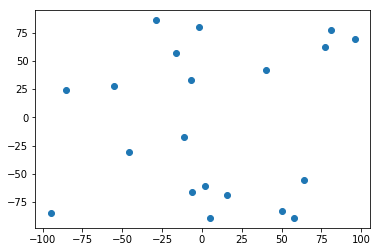

In [14]:
%matplotlib inline

import random
import matplotlib.pylab as plt

latitudes = [random.randint(-100, 100) for _ in range(20)]
longitude = [random.randint(-100, 100) for _ in range(20)]
plt.scatter(latitudes, longitude)

In [15]:
points = [(la, lo) for la, lo in zip(latitudes, longitude)]

In [16]:
points

[(-7, 33),
 (-85, 24),
 (16, -69),
 (-11, -17),
 (58, -89),
 (5, -89),
 (-2, 80),
 (-16, 57),
 (-95, -85),
 (50, -83),
 (-46, -31),
 (64, -55),
 (-55, 28),
 (2, -61),
 (96, 69),
 (40, 42),
 (81, 77),
 (-29, 86),
 (-6, -66),
 (77, 62)]

In [17]:
from random import choice
start_point = choice(points)
start_point

(-16, 57)

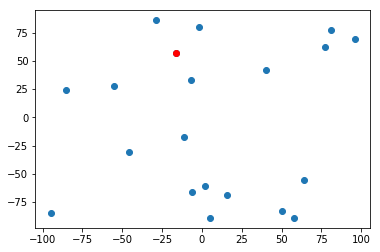

In [18]:
plt.scatter(latitudes, longitude)
plt.scatter(*start_point, c='r')

In [19]:
import math
from collections import defaultdict

distance = {}
dis_list = [] # 注意！！列表是引用类型
for p0 in points:
    for p1 in points:
        if p0 == p1:
            continue
        d = math.sqrt((p0[0]-p1[0])**2 + (p0[1]-p1[1])**2)
        dis_list += [(p1, d)]
    distance[p0] = sorted(dis_list, key=lambda x:x[1]) # 这样排序应该不是最优解
    dis_list = []

In [20]:
start_point

(-16, 57)

In [21]:
visited = []
def go_line(start_point, distance):
    visited.append(start_point)
    i = 0
    end_list = distance[start_point]
    while (i < len(end_list)):
        end_point, _ = end_list[i]
        if end_point in visited:
            i += 1
            continue
        else:
            start_point = end_point
            go_line(start_point, distance)
            break
#     for end_point, _ in distance[start_point]:
#         if end_point in visited:
#             continue
#         else:
#             plt.scatter(*zip(start_point, end_point), c='b')
#             plt.plot(*zip(start_point, end_point), c='r')
#             start_point = end_point
#             draw_line(start_point, distance)
#     i = 0
#     while (True):
#         end_point, _ = distance[start_point][i]
#         if end_point in visited:
#             i += 1
#             continue
#         else:
#             plt.plot(start_point, end_point, c='r')

In [22]:
go_line(start_point, distance)

In [23]:
visited += [visited[0]]

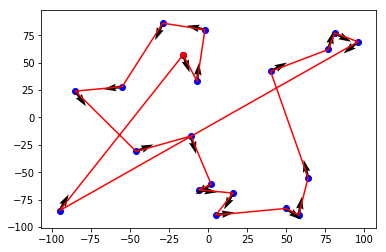

In [24]:
plt.plot(*zip(*visited), c='r')
plt.scatter(*zip(*visited), c='b')
plt.scatter(*start_point, c='r')
for i in range(len(visited)-1):
    x = visited[i][0]
    y = visited[i][1]
    u = visited[i+1][0]-visited[i][0]
    v = visited[i+1][1]-visited[i][1]
    plt.quiver(x, y, u, v)